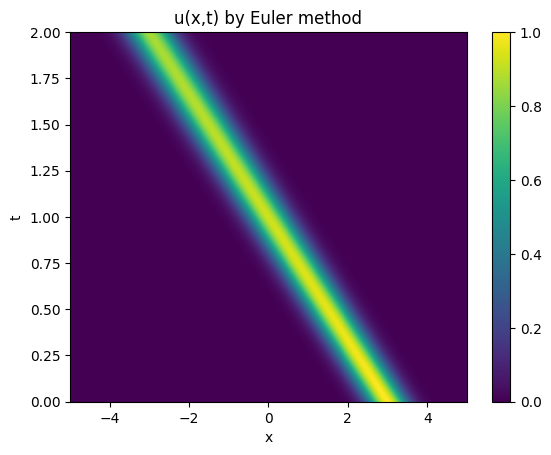

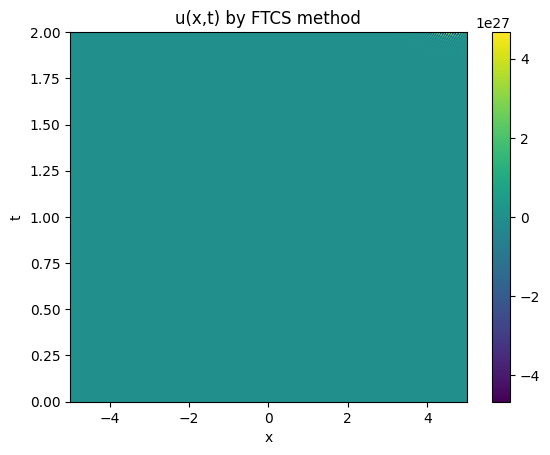

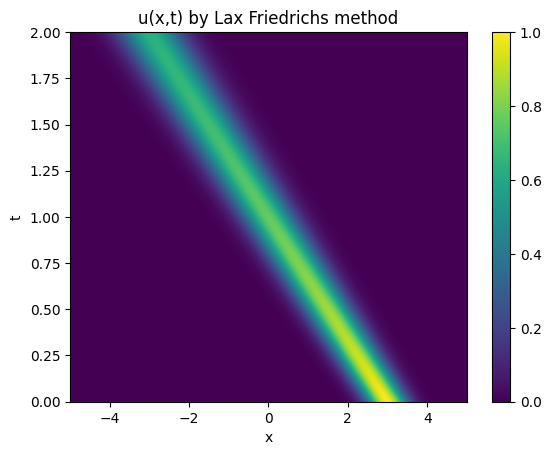

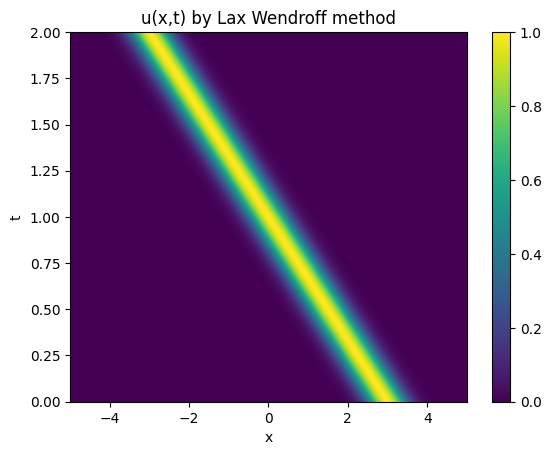

In [108]:
import numpy as np
import matplotlib.pyplot as plt

dx=0.01
dt=0.001
v=3
x=np.arange(-5+dx,5,dx)
t=np.arange(0,2+dt,dt)
r=v*dt/dx
y0=lambda x: np.exp(-4*(x-3)**2)

def solve_wave(Mat,y0,x,t):
    y=np.empty((np.size(x),np.size(t)))
    y[:,0]=y0(x)
    
    for i in range(1,np.size(t)):
        y[:,i]=Mat@y[:,i-1]
    return y    
        
def plot_solutions(x,t,y,label):    
    fig,ax=plt.subplots()            
    im=ax.pcolormesh(x,t,y.T)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title(f'u(x,t) by {label} method')
    fig.colorbar(im, ax=ax)
    
def plot_animation(x,t,y):  
        # Mention x and y limits to define their range
        plt.xlim(-5,5)
        plt.ylim(-0.1, 1.5)
        plt.ion()
        #plt.figure()
        for i in range(0,np.size(t)):
            # Ploting graph
            plt.clf()
            plt.plot(x, y[:,i], color = 'green')
            plt.show()
            plt.pause(0.01)
        
Eu=np.eye(np.size(x))-r*np.diag(np.ones(np.size(
    x)))+r*np.diag(np.ones(np.size(x)-1),1)

FTCS=np.eye(np.size(x))+r/2*np.diag(np.ones(
    np.size(x)-1),1)-r/2*np.diag(np.ones(np.size(x)-1),-1)

LF=(1+r)/2*np.diag(np.ones(np.size(x)-1),1)+(
    1-r)/2*np.diag(np.ones(np.size(x)-1),-1)

LW=r*(r+1)/2*np.diag(np.ones(np.size(x)-1),
    1)+r*(r-1)/2*np.diag(np.ones(np.size(x)-1),-1
                           )+(1-r**2)*np.diag(np.ones(np.size(x)))

Mat_list=[Eu,FTCS,LF,LW]
Label_list=['Euler','FTCS','Lax Friedrichs','Lax Wendroff']

for (Mat,label) in zip(Mat_list,Label_list):
    y=solve_wave(Mat,y0,x,t)
    plot_solutions(x,t,y,label)
    
#plot_animation(x,t,solve_wave(FTCS,y0,x,t))